<a href="https://www.kaggle.com/code/soumyadipbhat/spaceship-titanic?scriptVersionId=140312310" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Titanic Space Ship Competition:**
***
At First we have to download the data from the kaggle using kaggle API.
>*All the steps are mentaioned here :* https://www.kaggle.com/discussions/general/74235
***

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

***
*Now just take a look at the data, and then we'll decide the useful features and do some feature engineering.*
***

### Loading the competitions data:
> This is often confusing, loading the data, Here to load the data one has to follow the steps mentioned bellow:
> 1. click on `File`  on the top left of the notebook $\rightarrow$ select `add data`
> 2. At the right side search the name of the competition/dataset and search $\rightarrow$ data can be found.
> 3. If not, then one can use the filter feature adjuscent to the search bar.
> 4. Add the data, and to load the data one can hover over the data and then copy the path.
> 5. Congradulation! Data is loaded. 

In [3]:
# Loading the training data.
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## <font color ="#FF3366">Workflow: </font>
* <font color="orange">**Data Preparation**</font>
    * Mean, Median, Variation in features
    * Missing values
    * Label encode categorical features or make them columns with binary (True/False) values
    * Relation and relevance of the feature
    * Impute missing values
    * dimensionality reduction
    * Scaling the data [choose method according to the density distribution]
***
* <font color="orange">**Training Model and optimization:**</font>
    * Train 3 models [linear, knn, tree based model]
    * Perform grid search to optimize the hyperparameter
***
* <font color="orange">**Evaluation:**</font> 
    * Plot confusion matrix
    * Calculate precision, F1 score, recall
    * Plot training accuracy, testing accuracy curve
    * ROC curve

In [4]:
# General Information about the data [dtype, non-null values, memory-size]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
# Checking for number of null data columns
train_data.isnull().sum(axis = 0)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
# Statistical information about the data. [Mean, max, min, std values]
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


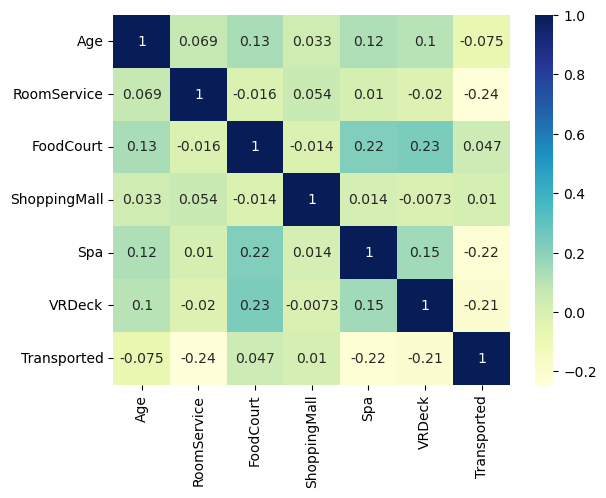

In [7]:
sns.heatmap(train_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

As we can see, there are some columns which has nothing to do with the target variable. so we will drop them.

In [8]:
train_data.drop(['Name', 'PassengerId'], inplace = True, axis = 1)

In [9]:
train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [10]:
# Now we have to transform categorical data into something numerical
# For Ordinal data we can use LabelEncoder() or mapping, and for Nominal data we have to do one-hot-encoding
le = LabelEncoder()
train_data['HomePlanet'] = le.fit_transform(train_data['HomePlanet'])

In [11]:
# We can do the same for the Destination column, but we will try some different approach

train_data['Destination'] = le.fit_transform(train_data['Destination'])

In [12]:
train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,False,B/0/P,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0,False,F/0/S,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,1,False,A/0/S,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,1,False,A/0/S,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0,False,F/1/S,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [13]:
# Now for the Cabin:
clean_cabin = train_data['Cabin'].str.split('/', expand = True)
clean_cabin.columns = ["Deck", "Cabin_Number", "Cabin_Position"]
clean_cabin

,Deck,Cabin_Number,Cabin_Position
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S
...,...,...,...
8688,A,98,P
8689,G,1499,S
8690,G,1500,S
8691,E,608,S


In [14]:
train_data = pd.concat([train_data, clean_cabin], axis = 1)
train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_Number,Cabin_Position
0,1,False,B/0/P,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,0,False,F/0/S,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,1,False,A/0/S,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,1,False,A/0/S,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,0,False,F/1/S,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [15]:
# We can now label encode these also:
train_data['Deck'] = le.fit_transform(train_data['Deck'])
train_data['Cabin_Number'] = le.fit_transform(train_data['Cabin_Number'])
train_data['Cabin_Position'] = le.fit_transform(train_data['Cabin_Position'])

In [16]:
# Now we can drop the original 'Cabin' column:
train_data.drop('Cabin', axis = 1, inplace = True)

In [17]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_Number,Cabin_Position
0,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,0
1,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True,5,0,1
2,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1
3,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1
4,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True,5,1,1


In [18]:
# We have to fill the missing values.
train_data.describe()

,HomePlanet,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_Number,Cabin_Position
count,8693.000000,8693.000000,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000,8693.000000
mean,0.719199,1.515242,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,4.389969,967.028414,0.539054
std,0.863402,0.840148,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,1.842573,515.338912,0.542487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,523.000000,0.000000
50%,0.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1009.000000,1.000000
75%,1.000000,2.000000,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,6.000000,1363.000000,1.000000
max,3.000000,3.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,8.000000,1817.000000,2.000000


<Axes: ylabel='Density'>

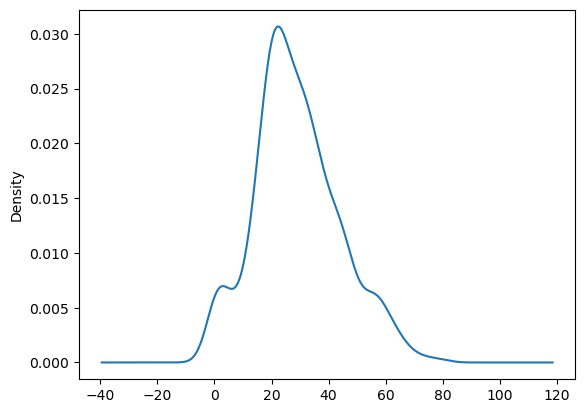

In [19]:
# Age:
train_data['Age'][:1000].plot.density()

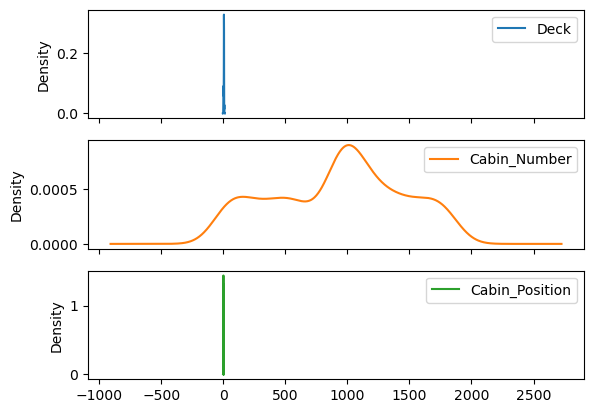

In [20]:
train_data[['Deck','Cabin_Number', 'Cabin_Position']][:1000].plot.density(subplots = True, rot = 0)
plt.show()

In [21]:
train_data['Deck'].value_counts()

5    2794
6    2559
4     876
1     779
2     747
3     478
0     256
8     199
7       5
Name: Deck, dtype: int64

In [22]:
train_data.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Deck',
       'Cabin_Number', 'Cabin_Position'],
      dtype='object')

In [23]:
# Now fill the missing values: 
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data['CryoSleep'] = train_data['CryoSleep'].fillna(train_data['CryoSleep'].mode()[0])
train_data['Destination'] = train_data['Destination'].fillna(train_data['Destination'].mode())
train_data['VIP'] = train_data['VIP'].fillna(train_data['VIP'].mode()[0])
train_data['RoomService'] = train_data['RoomService'].fillna(train_data['RoomService'].mean())
train_data['FoodCourt'] = train_data['FoodCourt'].fillna(train_data['FoodCourt'].mean())
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].mean())
train_data['Spa'] = train_data['Spa'].fillna(train_data['Spa'].mean())
train_data['VRDeck'] = train_data['VRDeck'].fillna(train_data['VRDeck'].mean())
train_data['Deck'] = train_data['Deck'].fillna(train_data['Deck'].mode())
train_data['Cabin_Number'] = train_data['Cabin_Number'].fillna(train_data['Cabin_Number'].mode())
train_data['Cabin_Position'] = train_data['Cabin_Position'].fillna(train_data['Cabin_Position'].mode())

In [24]:
train_data.isnull().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
Deck              0
Cabin_Number      0
Cabin_Position    0
dtype: int64

In [25]:
# Now Split the code into features and targets:
train_data_X = train_data.drop('Transported', axis = 1)
train_data_y = train_data['Transported']

In [26]:
# For this we are using RandomForestClassifier
rfc = RandomForestClassifier(n_jobs = 50)
rfc.fit(train_data_X, train_data_y)

RandomForestClassifier(n_jobs=50)

## AFTER:
have to make a function for this data cleaning for the test data.
and then have the result.

In [27]:
#Importing test data:
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [28]:
PassengerId = test_data['PassengerId'].values
PassengerId

array(['0013_01', '0018_01', '0019_01', ..., '9271_01', '9273_01',
       '9277_01'], dtype=object)

In [29]:
# Creating a function to pre-process the full data at once:
def process_data(data):
    data.drop(['Name', 'PassengerId'], inplace = True, axis = 1)
    le = LabelEncoder()
    data['HomePlanet'] = le.fit_transform(data['HomePlanet'])
    data['Destination'] = le.fit_transform(data['Destination'])
    
    clean_cabin = data['Cabin'].str.split('/', expand = True)
    clean_cabin.columns = ["Deck", "Cabin_Number", "Cabin_Position"]
    data = pd.concat([data, clean_cabin], axis = 1)
    
    data['Deck'] = le.fit_transform(data['Deck'])
    data['Cabin_Number'] = le.fit_transform(data['Cabin_Number'])
    data['Cabin_Position'] = le.fit_transform(data['Cabin_Position'])
    data.drop('Cabin', axis = 1, inplace = True)
    # Now fill the missing values: 
    data['Age'] = data['Age'].fillna(data['Age'].mean())
    data['CryoSleep'] = data['CryoSleep'].fillna(data['CryoSleep'].mode()[0])
    data['Destination'] = data['Destination'].fillna(data['Destination'].mode())
    data['VIP'] = data['VIP'].fillna(data['VIP'].mode()[0])
    data['RoomService'] = data['RoomService'].fillna(data['RoomService'].mean())
    data['FoodCourt'] = data['FoodCourt'].fillna(data['FoodCourt'].mean())
    data['ShoppingMall'] = data['ShoppingMall'].fillna(data['ShoppingMall'].mean())
    data['Spa'] = data['Spa'].fillna(data['Spa'].mean())
    data['VRDeck'] = data['VRDeck'].fillna(data['VRDeck'].mean())
    data['Deck'] = data['Deck'].fillna(data['Deck'].mode())
    data['Cabin_Number'] = data['Cabin_Number'].fillna(data['Cabin_Number'].mode())
    data['Cabin_Position'] = data['Cabin_Position'].fillna(data['Cabin_Position'].mode())
    return data

In [30]:
test_data = process_data(test_data)
test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Cabin_Number,Cabin_Position
0,0,True,2,27.0,False,0.0,0.0,0.0,0.0,0.0,6,820,1
1,0,False,2,19.0,False,0.0,9.0,0.0,2823.0,0.0,5,927,1
2,1,True,0,31.0,False,0.0,0.0,0.0,0.0,0.0,2,0,1
3,1,False,2,38.0,False,0.0,6652.0,0.0,181.0,585.0,2,1,1
4,0,False,2,20.0,False,10.0,0.0,635.0,0.0,0.0,5,1029,1


In [31]:
# predict on the test dataset.
y_prediction = rfc.predict(test_data)

In [32]:
# Create a dataframe to submit in the given form:
submission = pd.DataFrame({'PassengerId': PassengerId, 
                          'Transported' : y_prediction})
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [33]:
submission.to_csv('/kaggle/working/submission.csv', index = False)
pd.read_csv('/kaggle/working/submission.csv')

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


# Remarks:
As we can see with this we can achieve a prediction around ~80%.
To maximize the accuracy we can deep dive more into the hyperparameters of the classifier.